# Average Glycemia and Insulinemia in different patient types

## Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Functions

In [3]:
def display_dfs(dfs):
    # display an entire view on all the data frames
    for df in dfs:
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(dfs[df]) 

def filter_dfs(dfs,names):
    # filetering the data frames by names
    filtered_dfs = {}
    i            = 0
    
    for df in dfs:
        if(i < len(names) and df == names[i]):
            filtered_dfs[names[i]] = dfs[names[i]]
            i = i + 1
    
    return filtered_dfs

def filter_cols(dfs,cols):
    # filetering the columns in a dict of data frames
    dfs_out = {}
    
    for df in dfs:
        dfs_out[df] = dfs[df][cols].dropna()
        
    return dfs_out

def group_dfs(dfs,keys):
    # grouping the data in a dict of data frames
    grps = {}
    
    for df in dfs:
        grps[df] = dfs[df].groupby(keys)
        
    return grps

def g_to_dfs(gs,cols):
    # transforming a group into a data frame from a dict of groups
    dfs = {}
    
    for g in gs:
        dfs[g] = pd.DataFrame(data = gs[g][cols].mean())
    
    return dfs

def adding_t0(dfs,pos):
    # adding t0 in intial dataframes dict
    dfs_out = dfs
    
    for df in dfs:
        dfs_out[df].insert(pos, "Tps", 0)
    
    return dfs_out
        
def concat_dfs(dfs1,dfs2,init_names,names):
    # concatening the initials to the time series value from two dicts
    dfs3 = {}
    
    for i in range(len(dfs1)):
        dfs3[names[i]] = pd.concat([dfs1[init_names[i]], dfs2[names[i]]], levels = 0)
    
    return dfs3

## Importing the dataset

In [4]:
file           = r'../Pattou_data/Obediab_25092019.xls'
obediab        = pd.ExcelFile(file)
obediab_sheets = {}
sheet_names    = obediab.sheet_names

for sheet_name in sheet_names:
    obediab_sheets[sheet_name] = obediab.parse(sheet_name)

### Glimpse of the datasets

In [5]:
display_dfs(obediab_sheets)

,Num,Visite,Interv,IMC,Gly,HbA1c,HOMA2 IR,AUC-Gly,AUC-Xyl,AUC-GLP1,glu sens,rate sens
0,1,A,2,44.999274,9.44350,7.2,2.849003,2183.11500,58.950,1846.5,38.700325,9.089172e+02
1,2,A,2,71.808187,5.94385,6.8,1.226994,1363.19700,50.400,2458.5,38.394356,1.693739e+00
2,4,A,1,58.682576,10.44340,6.7,1.782531,2353.09800,57.450,2547.0,31.084639,1.726029e+02
3,5,A,1,41.038268,24.94195,7.1,62.500000,5398.62675,70.050,3570.0,3.479047,1.376076e+02
4,6,A,2,53.450387,4.99950,6.7,3.389831,1183.21500,54.150,4227.0,127.945853,1.453821e+03
5,7,A,1,43.388430,12.83205,7.6,4.608295,2653.06800,35.700,3676.5,14.619303,1.256276e+03
6,8,A,2,62.712585,10.38785,8.5,12.195122,2279.77200,40.350,2545.5,56.950814,1.000573e+03
7,9,A,2,72.355556,12.33210,9.9,3.875969,2845.54875,46.050,2143.5,52.229188,8.967370e+02
8,11,A,2,52.334780,15.60000,12.4,3.521127,NaN,NaN,NaN,NaN,NaN
9,12,A,2,51.639821,12.77650,7.9,8.064516,2768.05650,81.150,1236.0,26.865892,2.560371e+03


,Num,Visite,Tps,Gly,Ins,Xyl,GLP1,Cpep,ProIns
0,1,A,30,12.05435,395.8650,0.220,16.8,6.0,134.0
1,1,A,60,14.10970,447.9525,0.390,14.7,7.5,149.0
2,1,A,90,13.88750,546.5715,0.480,10.0,8.9,185.0
3,1,A,120,12.22100,115.2870,0.390,9.2,7.2,183.0
4,1,A,180,9.66570,196.5435,0.290,4.4,6.2,171.0
5,1,B,30,11.72105,1525.8165,0.300,168.3,16.5,180.0
6,1,B,60,5.61055,187.5150,0.270,64.0,10.3,123.0
7,1,B,90,3.88850,66.6720,0.160,35.0,6.2,71.6
8,1,B,120,4.16625,41.6700,NaN,27.3,4.1,48.0
9,1,B,180,4.77730,64.5885,0.070,15.0,3.7,34.0


,Num,Age,sexe,BF%,Taille,IMC,Poids,Ttaille,Thanche,Tasyst,Tadiast,Gly,Gly30,Ins,Cpep,ProIns,DI,Xyl,Xyl30,B12,folates,fruct,HbA1c,Lept,TG,Chol,LDL,HDL,GLP1,HOMA2 %B,HOMA2 %S,HOMA2 IR,HOMA2 %BS,AUC-Gly,AUC-Ins,AUC-Xyl,AUC-GLP1,AUC-Cpep,AUC-ProIns,basal isr,glu sens,rate sens,PFR1,PFR2,total isr,2-h OGIS,Stumvoll,Matsuda,Clins
0,t1,51,2,35.929964,1.67,24.20,67.491380,81,100,122,59,4.55510,5.33280,9.7230,1.7,10.6,199.142986,0,0.11,0.22,5.8,220,5.4,12.8,0.72,5.22,3.33,1.55,3.3,40.3,487.5,0.205128,196.4625,925.74075,13584.4200,38.70,1551.0,853.5,4560.0,70.207166,110.706638,2683.489539,1.126768,1.067207,41.452648,469.430355,10.563799,26.648972,3.108910
1,t2,43,1,21.571023,1.84,23.48,79.493888,84,96,119,75,4.77730,6.49935,37.5030,2.0,10.1,226.653698,0,0.10,0.38,4.0,228,5.5,3.3,0.79,5.12,3.39,1.37,6.2,90.0,125.6,0.796178,113.0400,1049.89500,32335.9200,38.55,1933.5,901.5,4338.0,84.227976,160.995003,134.575596,0.662299,0.524366,41.775006,420.846946,10.156378,9.448492,1.567601
2,t3,32,2,22.617011,1.72,17.92,53.014528,70,87,105,52,4.49955,4.27735,12.5010,1.6,12.8,-446.955446,0,0.13,0.49,4.1,225,5.5,3.5,0.62,5.20,3.15,1.76,6.3,48.8,381.1,0.262398,185.9768,758.25750,12250.9800,46.20,2500.5,660.0,5382.0,74.942726,81.094308,4004.839501,1.074891,1.398212,33.902751,496.517728,12.540075,26.123832,2.653732
3,t4,39,1,19.670869,1.72,22.65,67.007760,75,84,136,88,4.77730,6.05495,18.0570,1.6,15.3,157.093492,0,0.18,0.41,8.8,239,6.0,1.5,0.63,4.19,2.43,1.47,5.4,55.2,259.1,0.385951,143.0232,1029.06375,22637.2275,44.55,2457.0,916.5,4062.0,68.948459,198.719330,823.777995,0.890251,0.832614,44.720679,434.701224,10.624031,16.003841,2.279864
4,t5,34,2,27.061766,1.68,20.20,57.012480,69,84,132,68,4.33290,6.44380,20.8350,1.7,4.9,82.251646,0,0.25,0.35,6.9,220,5.9,6.6,1.13,4.68,2.56,1.60,6.0,73.8,232.4,0.430293,171.5112,1029.89700,24251.9400,60.15,2842.5,1128.0,2947.5,77.268458,155.745619,1559.715159,1.029429,0.602362,54.847376,504.701900,11.176702,14.768631,2.515127
5,t6,36,1,22.726477,1.77,24.89,77.977881,82,90,131,76,4.66620,5.61055,25.0020,1.5,9.6,201.506857,0,0.06,0.54,10.8,211,5.5,3.9,0.72,5.25,3.28,1.63,5.8,71.9,189.1,0.528821,135.9629,880.74525,14282.3925,30.45,1854.0,507.0,2253.0,63.300950,59.292090,1613.375806,0.810166,1.631779,24.132661,424.677085,10.461314,20.012171,2.192483
6,t7,35,1,23.530000,1.76,25.50,79.000000,102,103,126,75,4.83000,4.61065,24.3100,1.7,9.9,-481.246866,0,0.16,0.20,5.2,210,4.8,4.4,0.82,5.25,3.13,1.76,3.8,65.9,192.1,0.520562,126.5939,892.36800,16907.6400,45.30,1537.5,855.0,6181.5,72.721119,320.118345,6605.478667,0.563539,0.370996,41.993639,445.163267,9.787095,15.198481,2.422617
7,t8,40,2,32.280000,1.70,22.84,66.000000,78,92,148,97,4.66620,5.22170,20.1405,2.0,13.1,228.791179,0,0.18,0.16,6.2,258,5.2,12.1,1.15,5.07,2.66,1.89,NaN,62.2,234.3,0.426803,145.7346,1083.22500,20178.6975,52.35,NaN,970.5,7248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Num,Tps,Gly,Ins,Xyl,GLP1,Cpep,ProIns
0,t1,30,5.33280,164.5965,0.11,11.2,5.7,26.5
1,t1,60,4.44400,53.4765,0.18,8.9,4.8,23.6
2,t1,90,5.22170,79.1730,0.23,8.7,4.7,25.6
3,t1,120,5.38835,59.7270,0.26,10.3,5.0,27.4
4,t1,180,5.49945,61.1160,0.38,5.8,4.9,29.9
5,t2,30,6.49935,427.8120,0.10,11.2,5.8,23.1
6,t2,60,5.11060,228.4905,0.18,13.0,5.7,25.0
7,t2,90,5.72165,109.0365,0.23,11.8,4.8,19.8
8,t2,120,6.66600,163.9020,0.31,14.7,6.1,32.9
9,t2,180,5.27725,47.9205,0.31,3.3,3.6,22.3


,Num,Visite,Interv,D,Age,sexe,BF%,Taille,IMC,Poids,PP%,Gly,Gly30,Ins,Cpep,ProIns,DI,Xyl,Xyl30,fruct,HbA1c,Lept,GLP1,HOMA2 %B,HOMA2 %S,HOMA2 IR,HOMA2 %BS,AUC-Gly,AUC-Ins,AUC-Xyl,AUC-GLP1,AUC-Cpep,AUC-ProIns,Matsuda
0,nd01,A,2,ITG,50,2,58.512500,1.51,65.00,148.206500,NaN,5.49945,6.55490,149.3175,6.3,30.5,144.762897,0.0,0.18,201.0,5.8,54.9,3.3,175.5,31.3,3.194888,54.9315,1269.03975,52733.3850,47.70,999.0,1780.5,10249.5,3.145179
1,nd01,C,2,ITG,51,2,63.521734,1.51,43.42,99.001942,33.200000,4.33290,5.94385,35.4195,2.2,4.5,371.618610,0.0,0.24,204.0,5.4,NaN,3.3,105.0,137.4,0.727802,144.2700,826.58400,27252.1800,55.35,3250.5,1068.0,3489.0,10.456853
2,nd02,A,2,ITG,46,2,61.544000,1.72,60.00,177.504000,NaN,6.27715,10.11010,178.4865,4.6,26.3,126.653231,0.0,0.27,191.0,6.0,31.3,3.3,156.4,25.4,3.937008,39.7256,1378.19550,67234.5450,45.15,1098.0,1341.0,8977.5,1.905624
3,nd02,C,2,ITG,47,2,57.281384,1.72,33.12,97.982208,44.800000,4.72175,10.72115,50.6985,2.0,5.6,155.583558,0.0,0.17,190.0,4.8,NaN,3.3,112.7,93.7,1.067236,105.5999,956.57100,38419.7400,19.95,1953.0,864.0,2289.0,6.120586
4,nd03,A,2,ITG,34,2,63.877015,1.57,51.90,127.928310,NaN,6.22160,9.22130,30.5580,5.0,43.8,33.570857,0.0,0.27,191.0,6.6,NaN,3.3,46.8,141.1,0.708717,66.0348,1433.19000,153168.5025,54.75,888.0,2385.0,23493.0,3.658664
5,nd03,C,2,ITG,35,2,58.973085,1.57,36.11,89.007539,30.423892,4.49955,9.61015,101.3970,3.2,9.5,1074.106367,0.0,0.45,207.0,5.2,NaN,3.3,197.0,48.5,2.061856,95.5450,844.08225,208475.0100,70.05,2463.0,1858.5,6991.5,2.010313
6,nd04,A,1,ITG,54,1,58.551639,1.72,57.10,168.924640,NaN,6.38825,9.05465,329.1930,8.5,312.8,316.984136,0.0,0.26,189.0,6.6,43.6,3.3,233.7,14.4,6.944444,33.6528,1397.36025,173472.2100,52.95,627.0,2733.0,97392.0,0.897265
7,nd04,C,1,ITG,55,1,46.649986,1.72,33.12,97.982208,41.996497,4.99950,9.61015,45.8370,3.0,17.5,168.855693,0.0,0.21,170.0,5.1,NaN,3.3,94.2,101.5,0.985222,95.6130,835.74975,72922.5000,34.35,5019.0,1917.0,15373.5,4.683750
8,nd05,A,2,ITG,45,2,62.201442,1.58,40.60,101.353840,NaN,6.27715,10.05455,189.5985,4.8,84.4,125.022502,0.0,0.33,262.0,7.1,36.0,3.3,163.2,24.0,4.166667,39.1680,1390.69425,69234.7050,58.65,1539.0,1486.5,34554.0,1.772250
9,nd05,C,2,ITG,46,2,53.007581,1.58,28.84,71.996176,28.965517,5.66610,17.33160,43.7535,2.6,9.2,238.435772,0.0,0.29,243.0,5.9,NaN,5.6,71.6,102.0,0.980392,73.0320,1649.83500,180233.1675,44.85,5586.0,2815.5,15252.0,1.993015


,Num,Visite,Tps,Gly,Ins,Cpep,ProIns,Xyl,GLP1
0,nd01,A,30,6.55490,302.1075,8.9,43.2,0.18,7.0
1,nd01,A,60,7.72145,190.2930,9.2,54.6,0.24,9.2
2,nd01,A,90,7.72145,338.9160,11.0,57.8,0.34,7.2
3,nd01,A,120,7.55480,385.4475,11.2,74.4,0.36,3.3
4,nd01,A,180,6.22160,273.6330,10.3,59.2,0.29,3.3
5,nd01,C,30,5.94385,634.0785,13.1,41.6,0.24,51.0
6,nd01,C,60,3.99960,102.7860,7.7,26.2,0.20,27.5
7,nd01,C,90,4.11070,50.0040,5.1,16.2,0.18,19.2
8,nd01,C,120,4.33290,40.9755,3.6,12.7,0.49,3.8
9,nd01,C,180,4.83285,42.3645,3.2,11.0,0.49,3.3


The data frames **'obediab'**, **'temoins'**, and **'OB non diab'** have the time series for glycemia and insulinemia while the dataframes **'obediab t0'**, **'temoins t0'**, and **'OB non diab t0'** have the initial glycemia and insulinemia for the respective previous dataframes.

### Filtering the dataset

Let's separate the data frames containing the time series from those containing the initial values.

In [6]:
ts_dfs_names        = ['obediab','OB non diab']
init_dfs_names      = ['obediab t0','OB non diab t0']
# the 'temoins' are treated apart from the other data frames
ts_tems_dfs_names   = ['temoins']
init_tems_dfs_names = ['temoins t0']

ts_dfs        = filter_dfs(obediab_sheets,ts_dfs_names)
init_dfs      = filter_dfs(obediab_sheets,init_dfs_names)
ts_tems_dfs   = filter_dfs(obediab_sheets,ts_tems_dfs_names)
init_tems_dfs = filter_dfs(obediab_sheets,init_tems_dfs_names)

## Visualizing the Glycemia

### Filtering the columns

In [7]:
gly_ts_cols_names        = ['Num','Visite','Tps','Gly']
gly_init_cols_names      = ['Num','Visite','Gly']
gly_ts_tems_cols_names   = ['Num','Tps','Gly']
gly_init_tems_cols_names = ['Num','Gly']

gly_ts_dfs        = filter_cols(ts_dfs,gly_ts_cols_names)
gly_init_dfs      = filter_cols(init_dfs,gly_init_cols_names)
gly_ts_tems_dfs   = filter_cols(ts_tems_dfs,gly_ts_tems_cols_names)
gly_init_tems_dfs = filter_cols(init_tems_dfs,gly_init_tems_cols_names)

# adding a column 'Tps 0' to initial values
gly_init_dfs      = adding_t0(gly_init_dfs, 2)
gly_init_tems_dfs = adding_t0(gly_init_tems_dfs, 1)

# concatenating initial values data frames to the time series data frame
gly_ts_dfs      = concat_dfs(gly_init_dfs, gly_ts_dfs, init_dfs_names, ts_dfs_names)
gly_ts_tems_dfs = concat_dfs(gly_init_tems_dfs, gly_ts_tems_dfs, init_tems_dfs_names, ts_tems_dfs_names)

### Building relevant groups

In [8]:
gly_ts_g      = group_dfs(gly_ts_dfs ,['Visite','Tps'])
gly_ts_tems_g = group_dfs(gly_ts_tems_dfs ,['Tps'])

In [9]:
col_mean         =  ['Gly']
gly_ts_dfs3      = {}
gly_ts_tems_dfs3 = {}

gly_ts_dfs2      = g_to_dfs(gly_ts_g, col_mean)
gly_ts_tems_dfs2 = g_to_dfs(gly_ts_tems_g, col_mean)

# converting mmol/L in mg/dL
for df in gly_ts_dfs2:
    gly_ts_dfs3[df] = gly_ts_dfs2[df] * 180.156 * 10 ** -1

gly_ts_tems_dfs3['temoins'] = gly_ts_tems_dfs2['temoins'] * 180.156 * 10 ** -1

### Glimpse of the averaged datasets

In [10]:
display_dfs(gly_ts_dfs3) # obediab, OB non diab
display_dfs(gly_ts_tems_dfs3) # temoins

Gly
Visite Tps            
A      0    256.018458
       30   315.195983
       60   336.644231
       90   340.237893
       120  324.407585
       180  285.127497
B      0    170.617581
       30   259.150889
       60   237.396129
       90   221.121759
       120  210.851987
       180  185.046506
C      0    127.784511
       30   211.018782
       60   185.856651
       90   170.058835
       120  157.787531
       180  138.320238
D      0    144.411406
       30   233.794077
       60   209.262327
       90   190.580219
       120  179.981780
       180  159.122117

Gly
Visite Tps            
A      0    100.210094
       30   135.236924
       60   135.970819
       90   128.832018
       120  115.555181
       180   93.605034
C      0     89.568609
       30   150.901304
       60   105.151974
       90    87.710042
       120   80.776160
       180   82.348793

,Gly
Tps,
0,83.557591
30,99.200987
60,92.570909
90,99.200987
120,103.579341
180,86.065926


Text(0.5, 1.0, 'temoins')

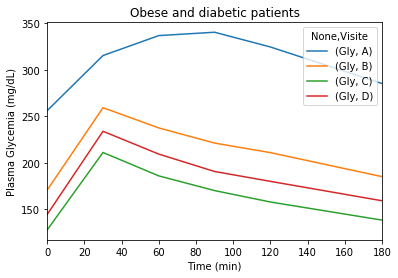

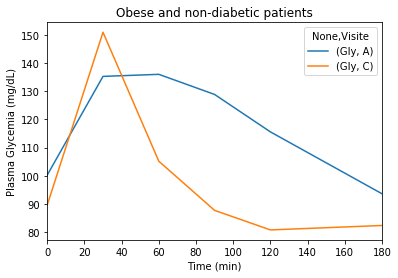

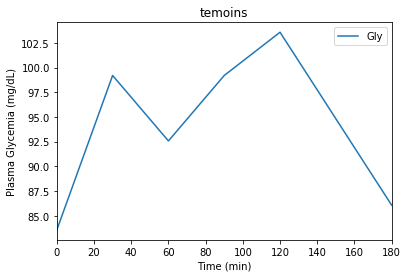

In [14]:
gly_ts_plot = gly_ts_dfs3['obediab'].unstack(level = 0).plot()
gly_ts_plot.set_ylabel('Plasma Glycemia (mg/dL)')
gly_ts_plot.set_xlabel('Time (min)')
gly_ts_plot.set_title('Obese and diabetic patients')
plt.savefig('obediab_G.jpg')

gly_ts_plot2 = gly_ts_dfs3['OB non diab'].unstack(level = 0).plot()
gly_ts_plot2.set_ylabel('Plasma Glycemia (mg/dL)')
gly_ts_plot2.set_xlabel('Time (min)')
gly_ts_plot2.set_title('Obese and non-diabetic patients')

gly_ts_tems_plot = gly_ts_tems_dfs3['temoins'].plot()
gly_ts_tems_plot.set_ylabel('Plasma Glycemia (mg/dL)')
gly_ts_tems_plot.set_xlabel('Time (min)')
gly_ts_tems_plot.set_title('temoins')

## Visualizing the Insulinemia

### Filtering the columns

In [16]:
ins_ts_cols_names        = ['Num','Visite','Tps','Ins']
ins_init_cols_names      = ['Num','Visite','Ins'] # /!\ No intial insulinemia value in obediab data frame
ins_ts_tems_cols_names   = ['Num','Tps','Ins']
ins_init_tems_cols_names = ['Num','Ins']

# in consequence, databases are modified (1)
init_dfs_names = ['OB non diab t0']
init_dfs       = filter_dfs(obediab_sheets,init_dfs_names)


ins_ts_dfs        = filter_cols(ts_dfs,ins_ts_cols_names)
ins_init_dfs      = filter_cols(init_dfs,ins_init_cols_names)
ins_ts_tems_dfs   = filter_cols(ts_tems_dfs,ins_ts_tems_cols_names)
ins_init_tems_dfs = filter_cols(init_tems_dfs,ins_init_tems_cols_names)

# in consequence, databases are modified (2)
ins_init_dfs['obediab t0'] = obediab_sheets['obediab t0'][['Num','Visite']]

# adding a column 'Tps 0' to initial values
ins_init_dfs      = adding_t0(ins_init_dfs,2)
ins_init_tems_dfs = adding_t0(ins_init_tems_dfs,1)

# /!\ adding an hypothetic initial insulinemia value
ins_init_dfs['obediab t0'].insert(3, "Ins", 0.0)

# in consequence, databases are modified (2)
interm                         = ins_init_dfs
ins_init_dfs                   = {}
ins_init_dfs['obediab t0']     = interm['obediab t0']
ins_init_dfs['OB non diab t0'] = interm['OB non diab t0']
init_dfs_names                 = ['obediab t0','OB non diab t0']

# concatenating initial values data frames to the time series data frame
ins_ts_dfs      = concat_dfs(ins_init_dfs,ins_ts_dfs, init_dfs_names,ts_dfs_names)
ins_ts_tems_dfs = concat_dfs(ins_init_tems_dfs,ins_ts_tems_dfs, init_tems_dfs_names,ts_tems_dfs_names)

### Building relevant groups

In [17]:
ins_ts_g        = group_dfs(ins_ts_dfs ,['Visite','Tps'])
ins_ts_tems_g   = group_dfs(ins_ts_tems_dfs ,['Tps'])

In [18]:
col_mean =  ['Ins']

ins_ts_dfs2      = g_to_dfs(ins_ts_g, col_mean)
ins_ts_tems_dfs2 = g_to_dfs(ins_ts_tems_g, col_mean)

### Glimpse of the averaged datasets

In [19]:
#display_dfs(ins_ts_dfs2) # obediab, OB non diab
#display_dfs(ins_ts_tems_dfs2) # temoins

Text(0.5, 1.0, 'temoins')

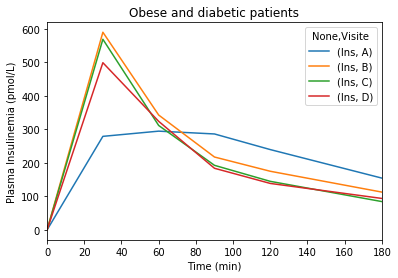

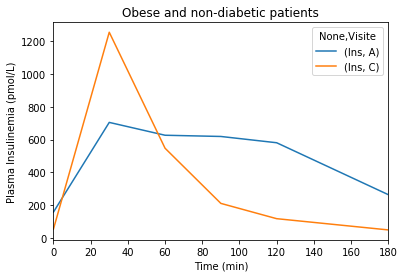

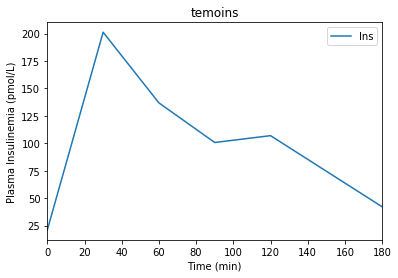

In [20]:
ins_ts_plot = ins_ts_dfs2['obediab'].unstack(level = 0).plot()
ins_ts_plot.set_ylabel('Plasma Insulinemia (pmol/L)')
ins_ts_plot.set_xlabel('Time (min)')
ins_ts_plot.set_title('Obese and diabetic patients')
plt.savefig('obediab_I.jpg')

ins_ts_plot2 = ins_ts_dfs2['OB non diab'].unstack(level = 0).plot()
ins_ts_plot2.set_ylabel('Plasma Insulinemia (pmol/L)')
ins_ts_plot2.set_xlabel('Time (min)')
ins_ts_plot2.set_title('Obese and non-diabetic patients')

ins_ts_tems_plot2 = ins_ts_tems_dfs2['temoins'].plot()
ins_ts_tems_plot2.set_ylabel('Plasma Insulinemia (pmol/L)')
ins_ts_tems_plot2.set_xlabel('Time (min)')
ins_ts_tems_plot2.set_title('temoins')